In [426]:
#import required libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [427]:
df = pd.read_csv('Car details v3.csv')

In [428]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [429]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [431]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


CLEAN


Name

In [433]:
df['name']

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object

In [434]:
len(df['name'].unique())

2058

có thể thấy các hãng xe đều có chữ đầu tiên trong tên  là Brand của hãng xe ( ví dụ : Honda City 2017-2020 EXi thì Brand là Honda)

In [435]:
def get_car_brand():
    car_brand_list= []
    for name in df['name']:
        car_brand_list.append(name.split(' ')[0])
    return car_brand_list

In [436]:
df['brand'] = get_car_brand()

In [437]:
df['brand']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8128, dtype: object

## Year

ta có thể tính tuổi của xe bằng cách lấy năm hiện tại trừ năm sản xuất

1.   List item
2.   List item



In [438]:
df['year']

0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8123    2013
8124    2007
8125    2009
8126    2013
8127    2013
Name: year, Length: 8128, dtype: int64

In [439]:
df["car_age"] = (datetime.datetime.now().year) - (df["year"])

In [440]:
df["car_age"]

0        9
1        9
2       17
3       13
4       16
        ..
8123    10
8124    16
8125    14
8126    10
8127    10
Name: car_age, Length: 8128, dtype: int64

Fuel

In [441]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

Owner

In [442]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

km_driven: số KM mà xe đã đi

In [443]:
df['km_driven'].describe().round()

count       8128.0
mean       69820.0
std        56551.0
min            1.0
25%        35000.0
50%        60000.0
75%        98000.0
max      2360457.0
Name: km_driven, dtype: float64

In [444]:
df['km_driven'].value_counts()

120000    536
70000     456
80000     448
60000     425
50000     391
         ... 
59635       1
123219      1
65300       1
39395       1
191000      1
Name: km_driven, Length: 921, dtype: int64

In [445]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

selling_price

In [446]:
df['selling_price'].describe().round()

count        8128.0
mean       638272.0
std        806253.0
min         29999.0
25%        254999.0
50%        450000.0
75%        675000.0
max      10000000.0
Name: selling_price, dtype: float64

mileage : đơn vị tính số Kilomet đi được với 1lit chất đốt

In [447]:
df['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8128, dtype: object

In [448]:
df["mileage"]

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8128, dtype: object

In [449]:
df["mileage"] = df["mileage"].str.extract('([^\s]+)').astype("float")

In [450]:
df["mileage"].replace(np.nan, "%.3f" % df["mileage"].astype("float").mean(axis=0), inplace=True)

In [451]:
df["mileage"] = df["mileage"].astype("float")

Engine: công suất động cơ


In [452]:
df["engine"] = df["engine"].str.extract('([^\s]+)').astype("float")

In [453]:
df["engine"].replace(np.nan, "%.3f" % df["engine"].astype("float").mean(axis=0), inplace=True)

In [454]:
df["engine"] = df["engine"].astype("float")

max_power : tốc độ tối đa của động cơ

In [455]:
df["max_power"]

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object

In [456]:
df["max_power"] = df["max_power"].str.extract('([^\s]+)')
df["max_power"] = df["max_power"][~(df["max_power"] == "bhp")]
df["max_power"] = df["max_power"].astype("float")

In [457]:
df["max_power"].replace(np.nan, "%.3f" % df["max_power"].astype("float").mean(axis=0), inplace=True)


In [458]:
df["max_power"] = df["max_power"].astype("float")

In [459]:
df["max_power"]

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

Seats : số ghế ngồi trên xe

In [460]:
df["seats"].replace(np.nan, df['seats'].value_counts().idxmax(), inplace=True)
df['seats'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8128 entries, 0 to 8127
Series name: seats
Non-Null Count  Dtype  
--------------  -----  
8128 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


In [461]:
df['seats'].value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [462]:
df.drop(['torque'], axis = 1, inplace = True)
df.drop(['year'], axis = 1, inplace = True)
df.drop(['name'], axis = 1, inplace = True)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         8128 non-null   float64
 8   max_power      8128 non-null   float64
 9   seats          8128 non-null   float64
 10  brand          8128 non-null   object 
 11  car_age        8128 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [464]:
df.head(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,16


Visualizations and EDA

Boxplot

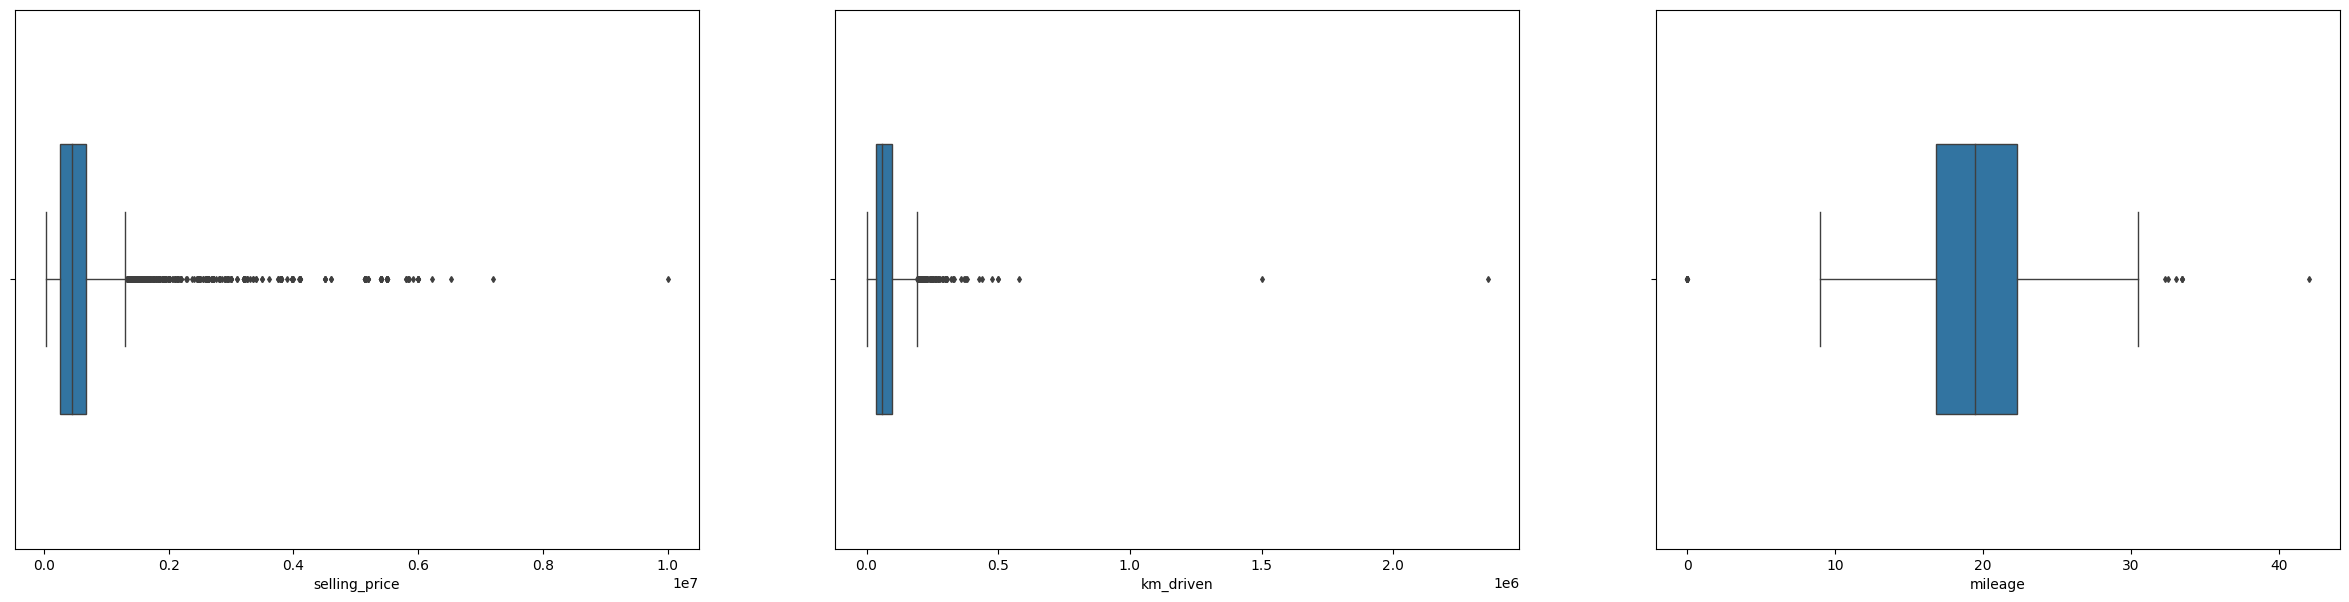

In [465]:
fig, axes = plt.subplots(1, 3, figsize = (30, 7))

sns.boxplot(ax = axes[0], x = "selling_price", data = df, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[1], x = "km_driven", data = df, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[2], x = "mileage", data = df, width = 0.5, fliersize = 3, linewidth = 1);

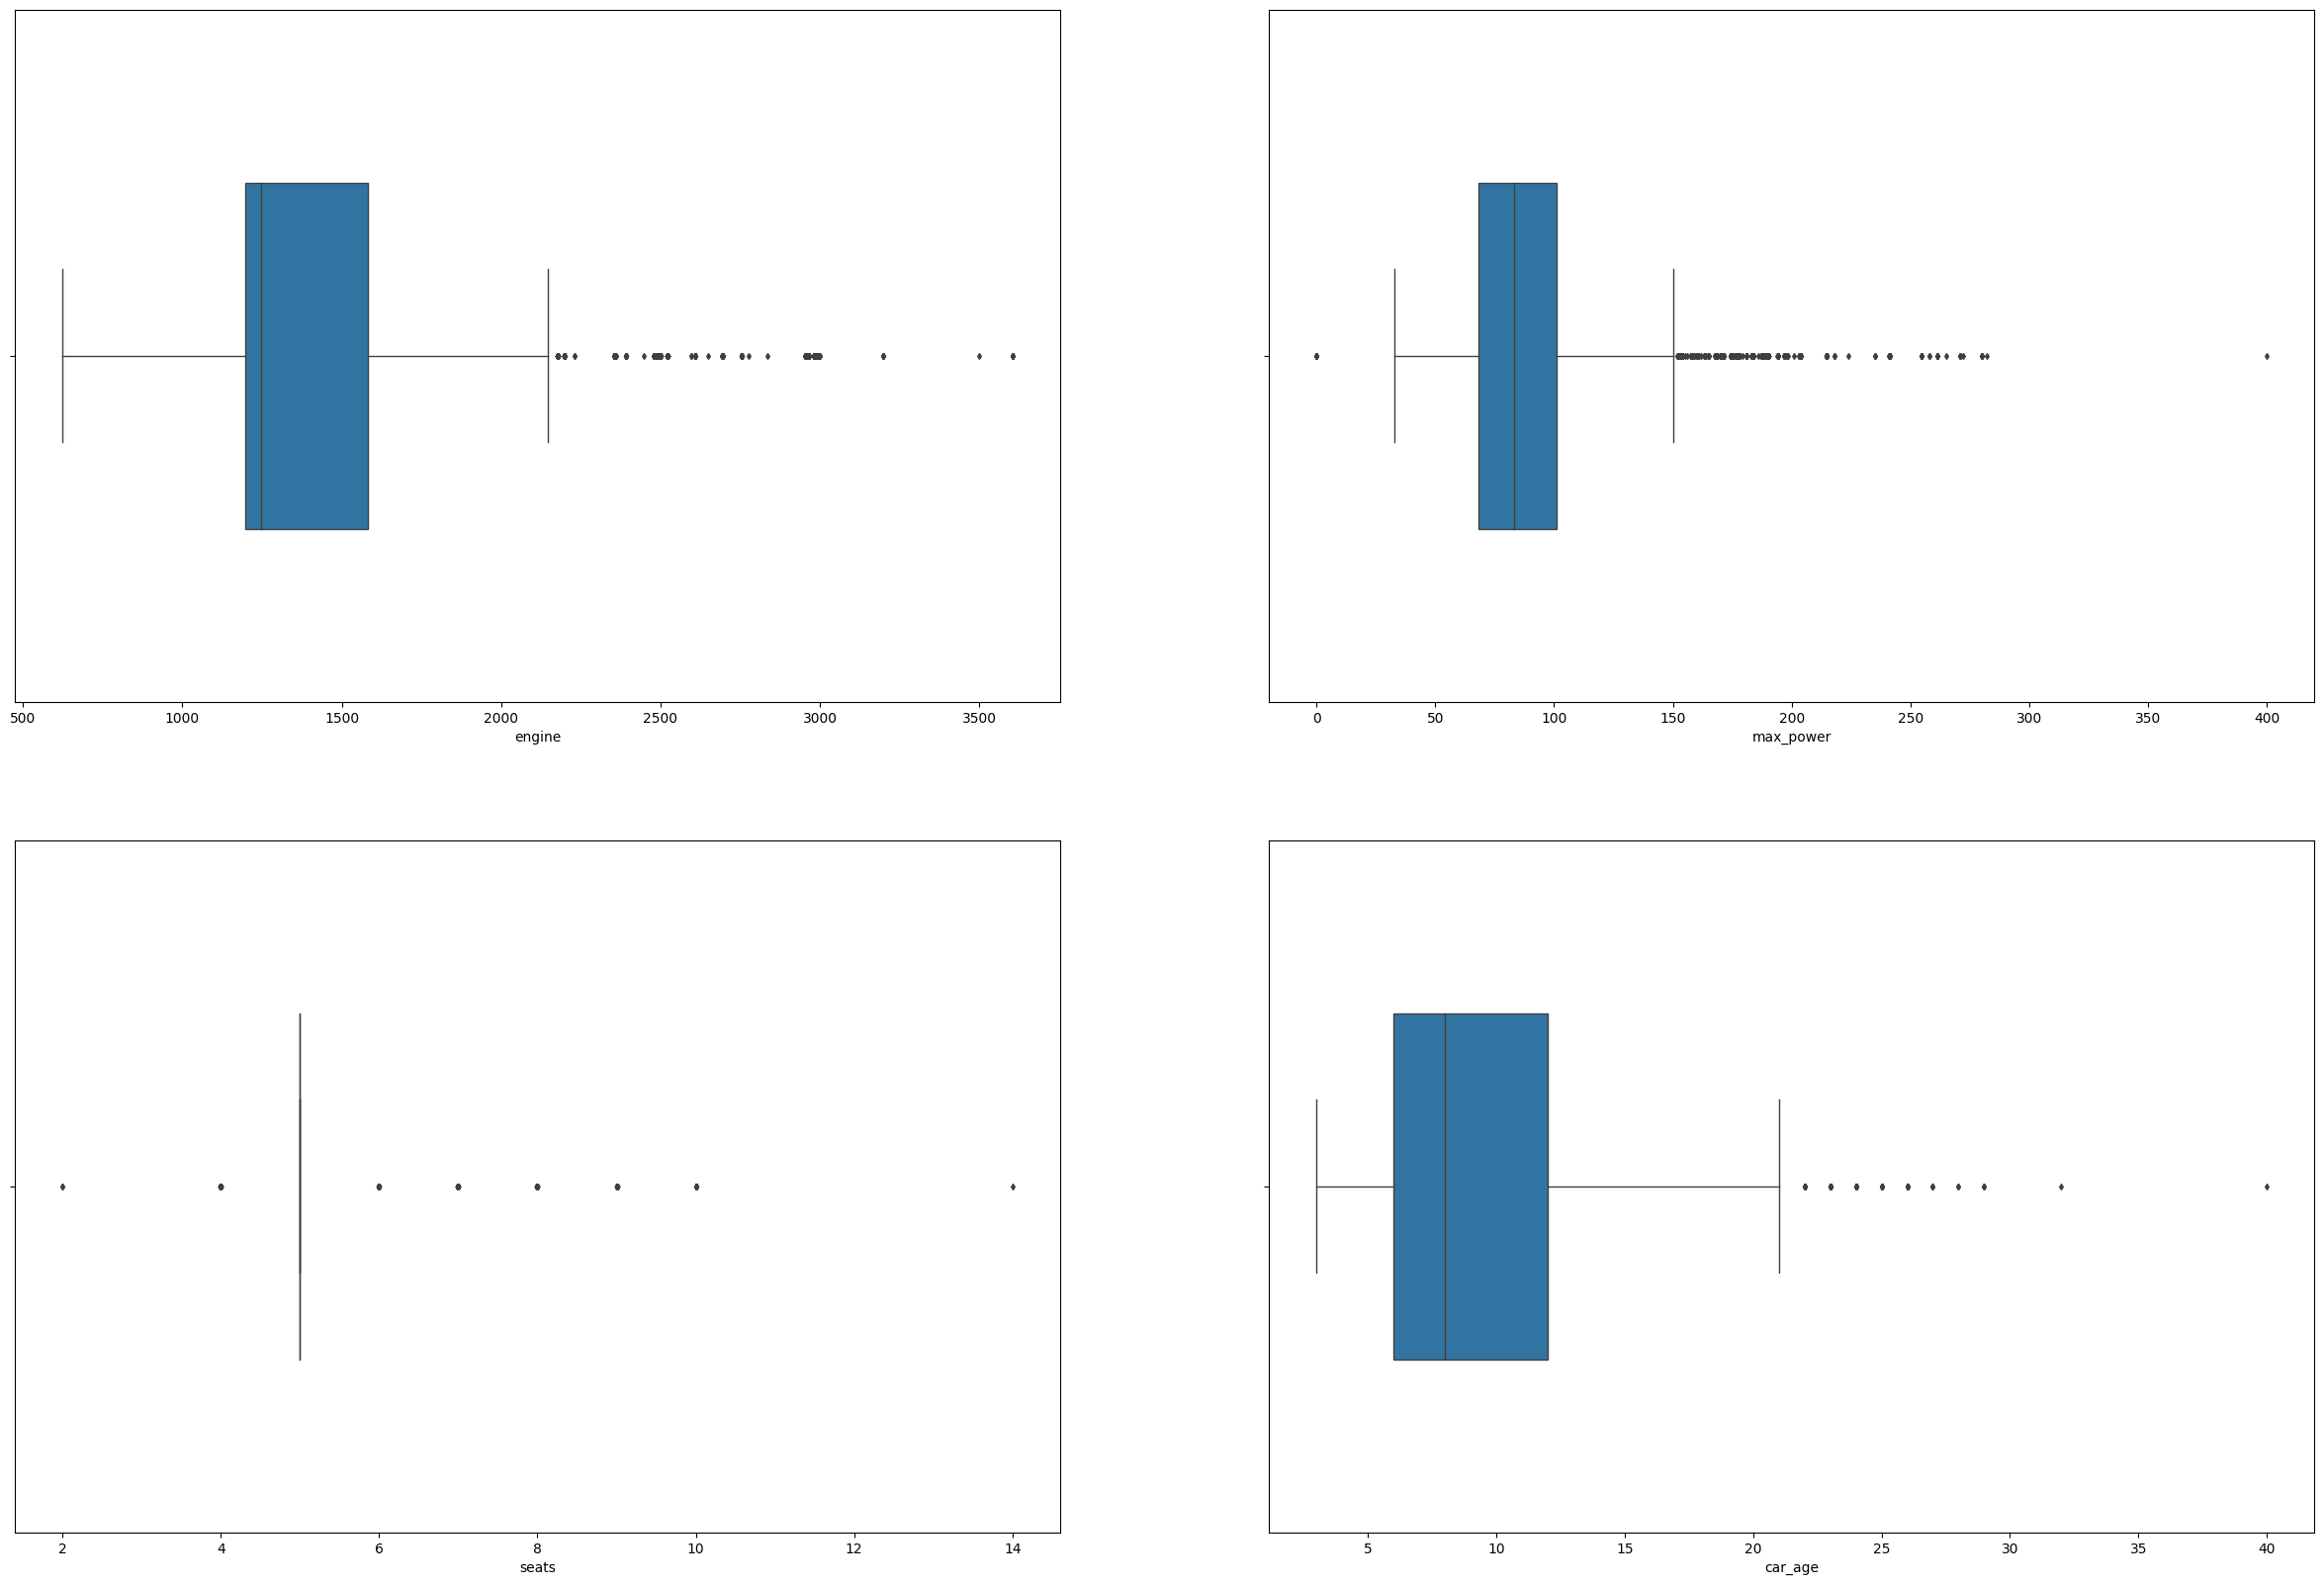

In [466]:
fig, axes = plt.subplots(2, 2, figsize = (30, 20))
axes = axes.flatten()

sns.boxplot(ax = axes[0], x = "engine", data = df, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[1], x = "max_power", data = df, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[2], x = "seats", data = df, width = 0.5, fliersize = 3, linewidth = 1);
sns.boxplot(ax = axes[3], x = "car_age", data = df, width = 0.5, fliersize = 3, linewidth = 1);

Histogram

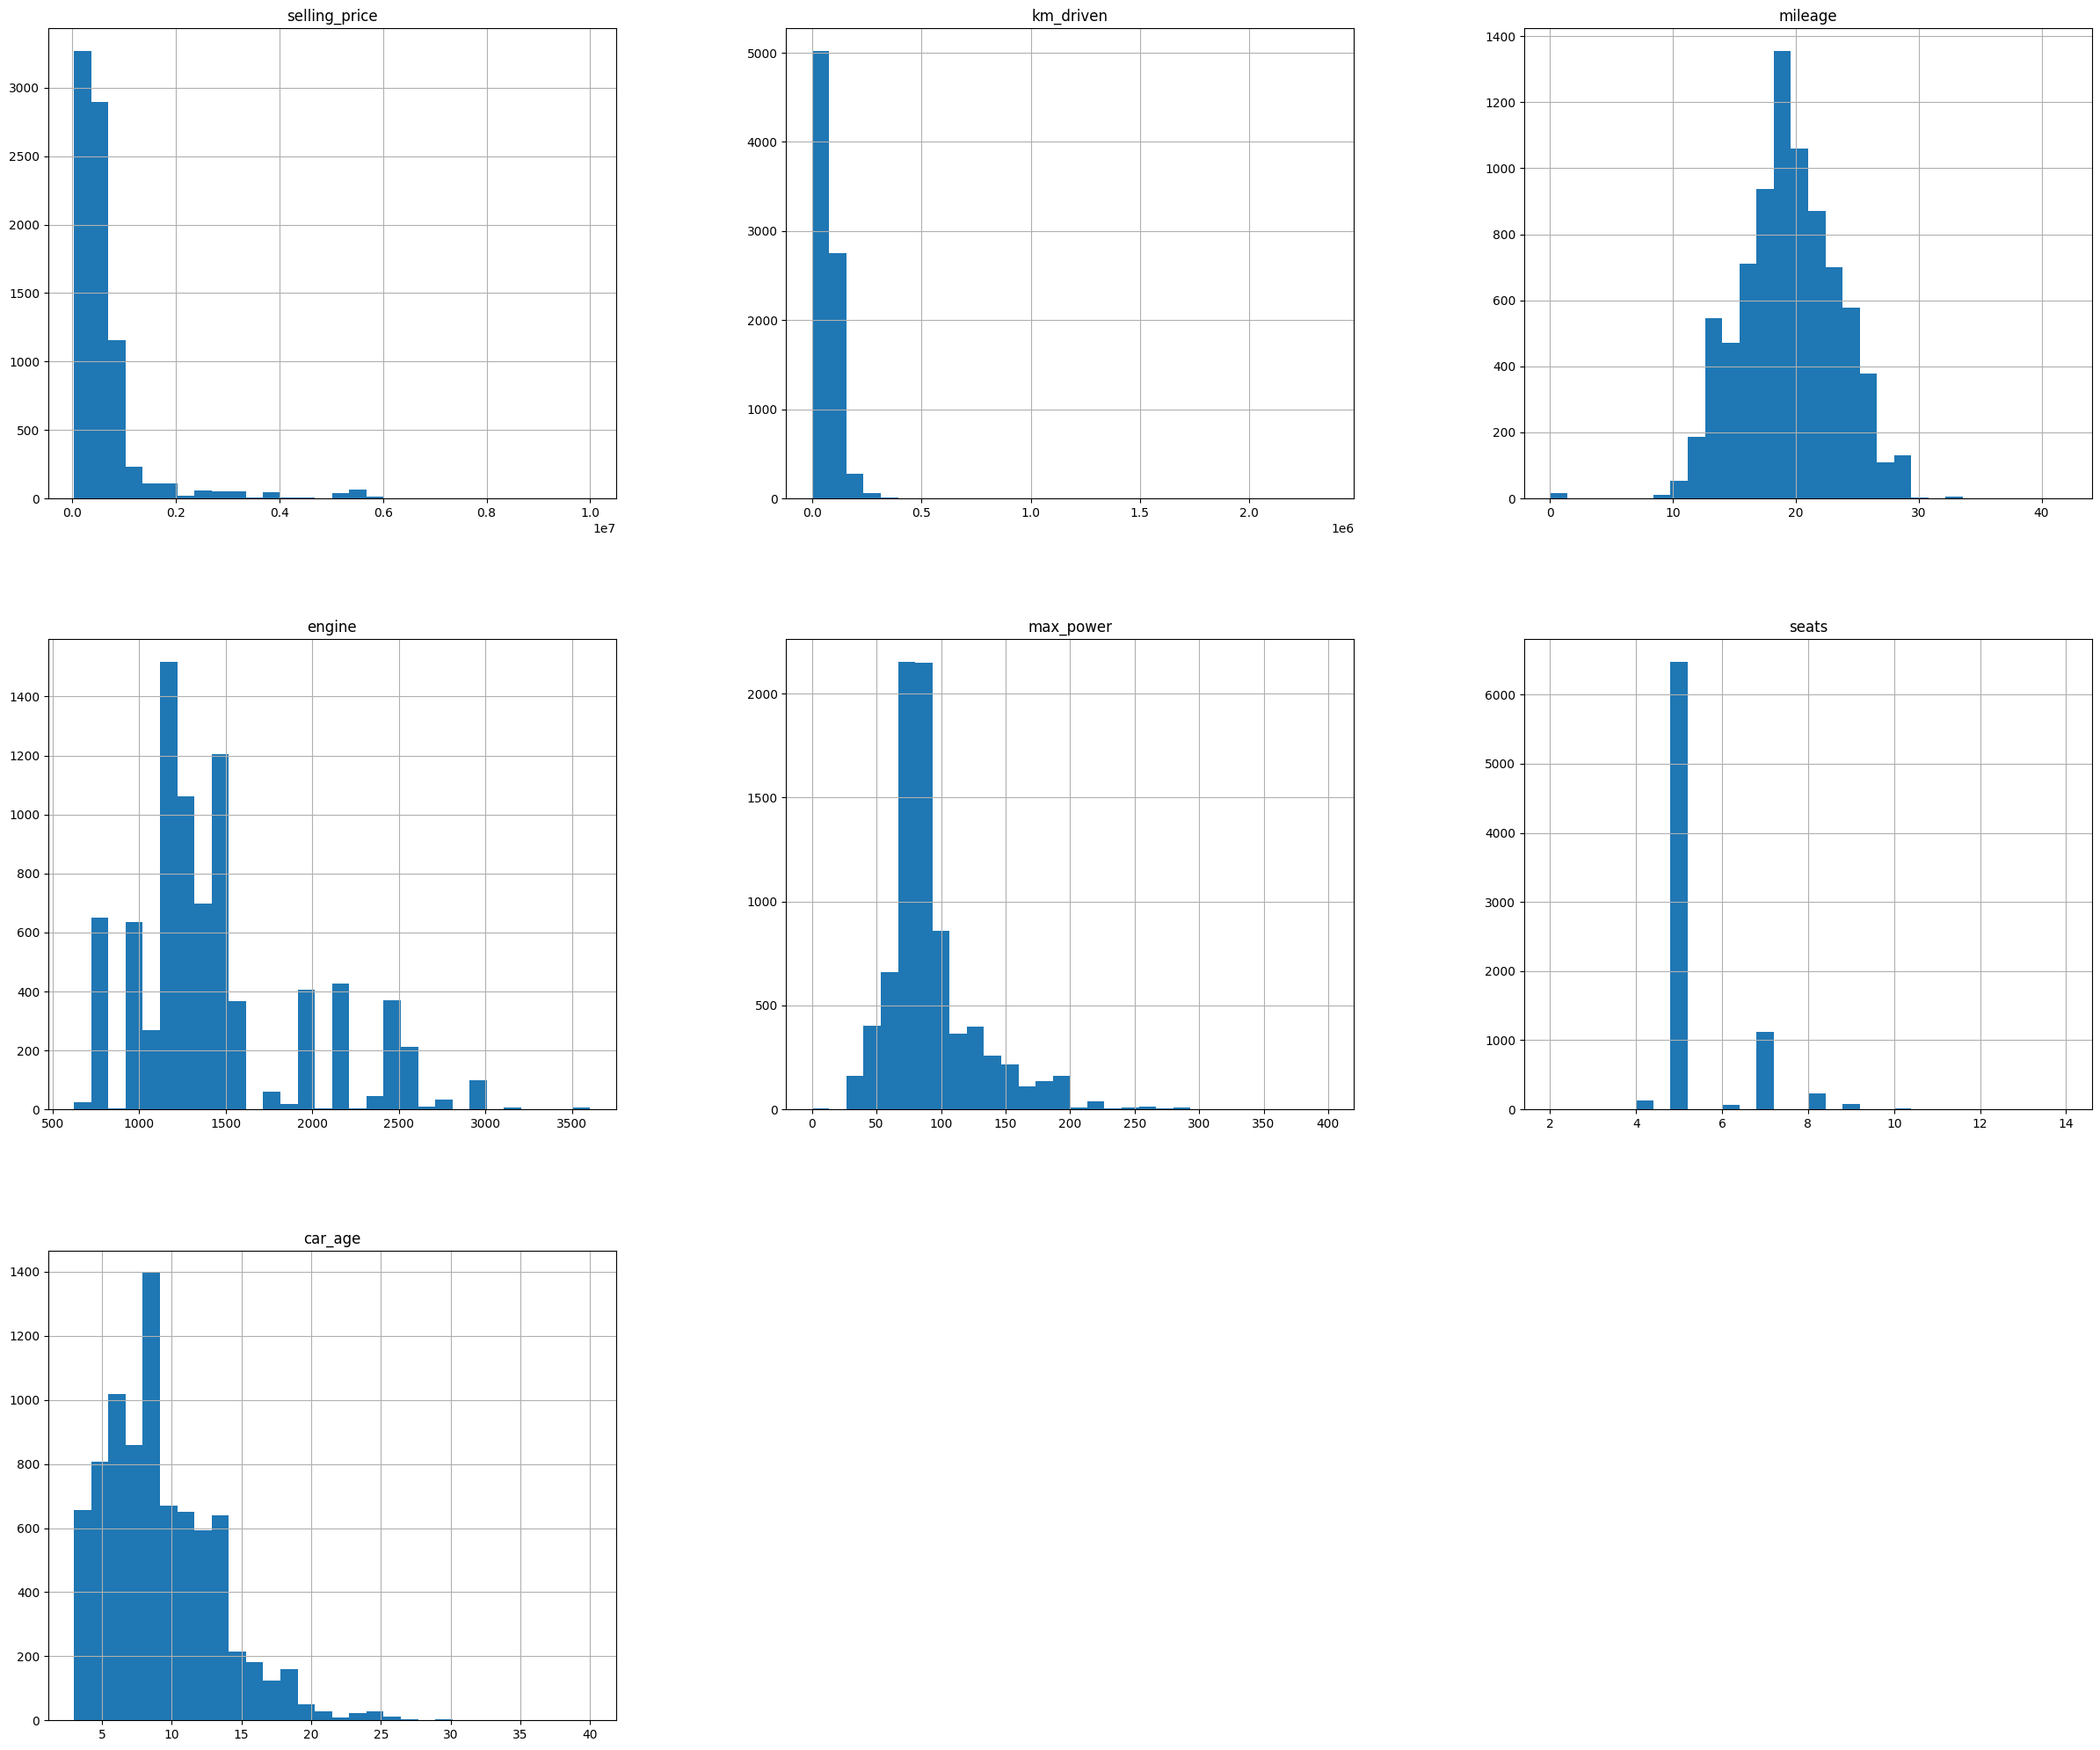

In [467]:
df.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

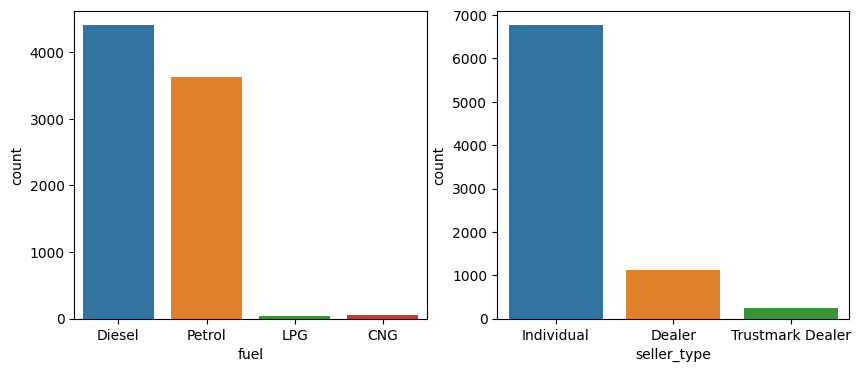

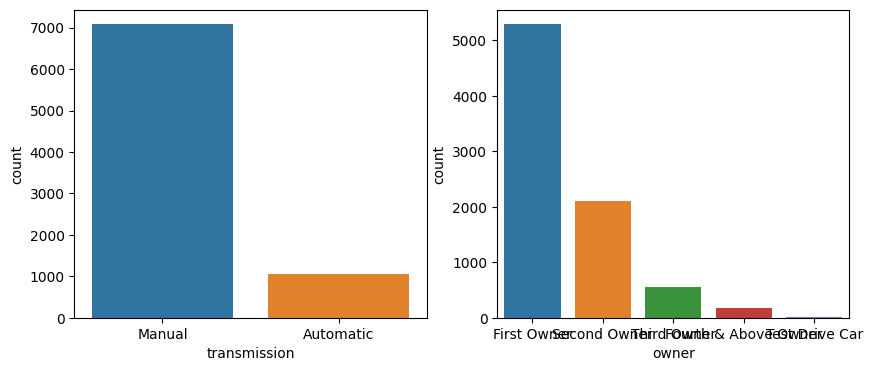

In [468]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

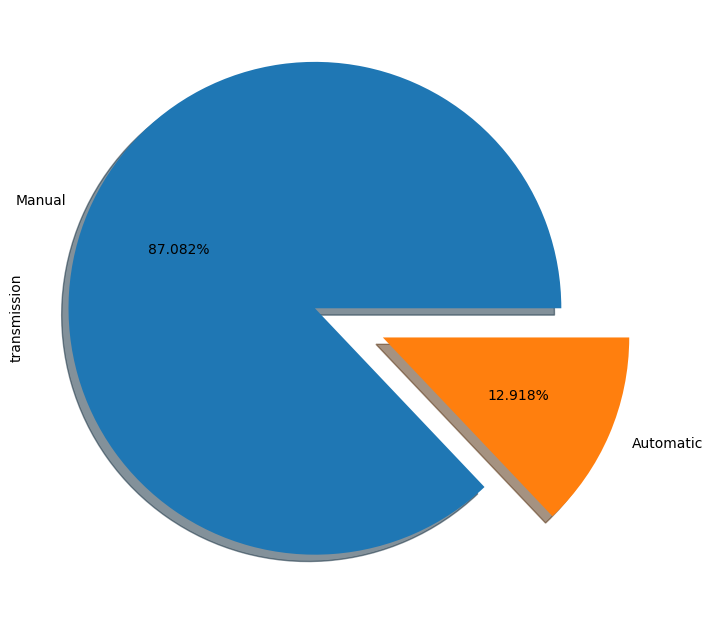

In [469]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#FFFFFF")
df["transmission"].value_counts().plot.pie(explode = [0.1, 0.2], autopct='%1.3f%%', shadow = True);

In [470]:
import plotly.express as px
fig = px.histogram(df, x = "car_age",
                   y = "selling_price",
                   marginal = None, text_auto = True,
                   color = "owner", hover_data  = df.columns, width = 850, height = 500)
fig.show()



*   Xe được mua nhiều nhất từ năm thứ 3 trở đi , có vẻ giá xe trong 3 năm đầu khá cao nên người mua thường lựa chọn xe từ năm thứ 3 trở đi
*   Doanh thu cao nhất đến từ xe đã 1 người sử dụng




In [471]:
import plotly.express as px
fig = px.histogram(df, x = "owner",
                   y = "selling_price",
                   marginal = None, text_auto = True,
                   color = "owner", hover_data  = df.columns, width = 850, height = 500)
fig.show()

In [472]:
import plotly.express as px
fig = px.histogram(df, x = "brand",
                   y = "selling_price",
                   marginal = None, text_auto = True,
                   color = "owner", hover_data  = df.columns, width = 850, height = 500)
fig.show()

In [473]:
top10_cars = df['brand'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [df[df['brand'] == i]['selling_price'].mean() for i in list(top10_cars.index)]

In [474]:
top10_cars

Maruti        2448
Hyundai       1415
Mahindra       772
Tata           734
Toyota         488
Honda          467
Ford           397
Chevrolet      230
Renault        228
Volkswagen     186
Name: brand, dtype: int64

In [475]:
top10_mean_prices

[403075.7214052288,
 458554.3667844523,
 623224.0556994819,
 357433.1076294278,
 959946.6741803279,
 596178.0149892934,
 516682.58186397987,
 273867.47826086957,
 462618.38157894736,
 498817.188172043]

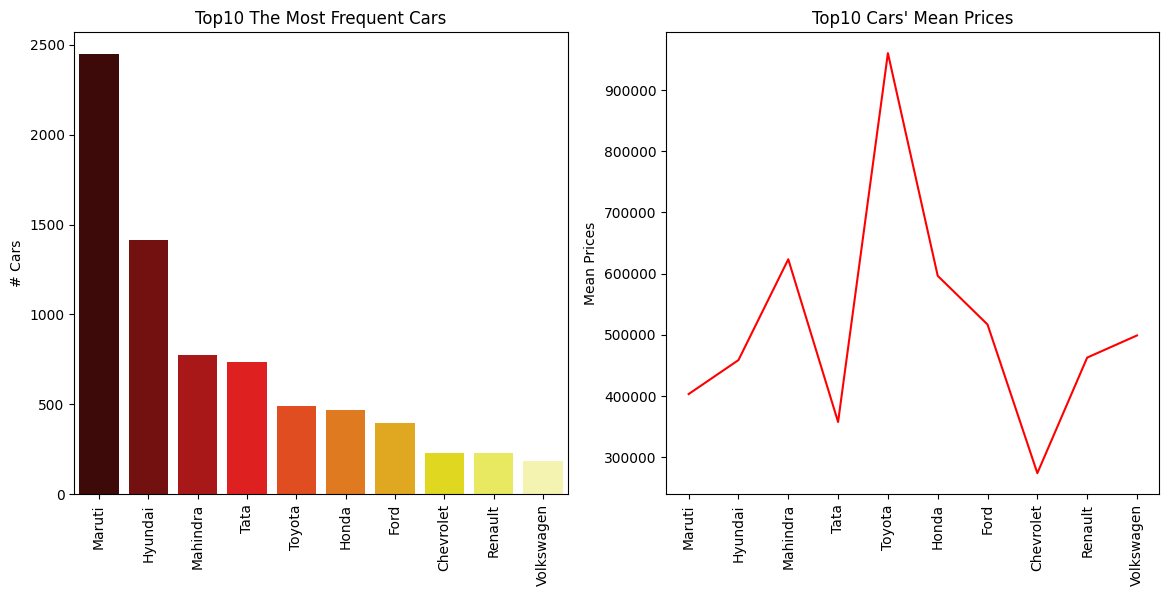

In [476]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(x = top10_cars.index, y = top10_cars.values, palette='hot')
plt.xticks(rotation = 90)
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(x=top10_cars.index, y=top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()



*   Hãng xe Maruti dù số lượng bán nhiều nhất và cách biệt khá xa với các hãng xe khác nhưng giá xe trung bình khá thấp
*   



In [477]:
import plotly.express as px
fig = px.histogram(df, x = "seats",
                   y = "selling_price",
                   marginal = None, text_auto = True,
                   color = "fuel", hover_data  = df.columns, width = 850, height = 500)
fig.show()

In [478]:
fig = px.histogram(df, x = "car_age",
                   y = "km_driven",
                   marginal = None, text_auto = True,
                   color = "owner", hover_data  = df.columns, width = 850, height = 500)
fig.show()

<ipython-input-479-30d0da79058b>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



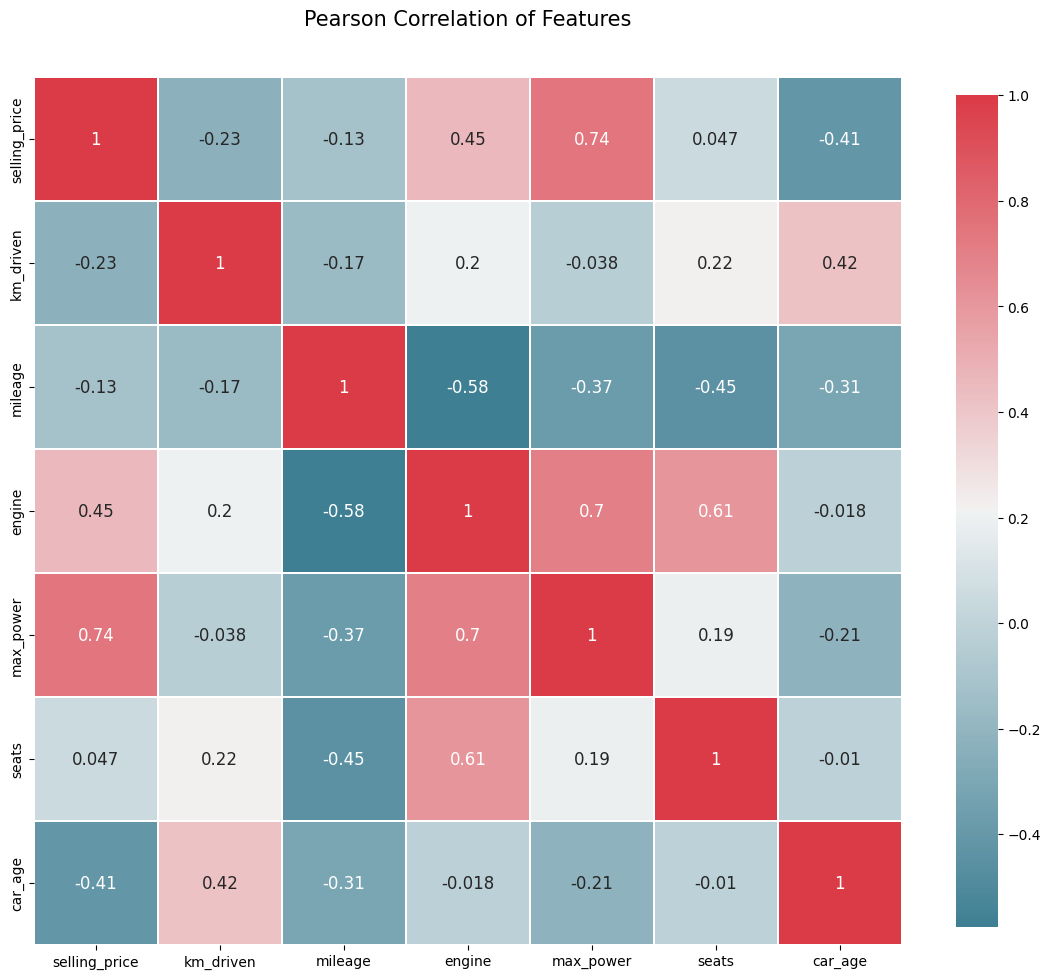

In [479]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

*   giữa các biến 'mileage' và 'engine' : 0,57
*   giữa các biến 'max_power' và 'engine' : 0,70
*   giữa các biến 'seats' và 'engine' : 0,61
*   giữa các biến 'max_power' và 'selling_price' : 0,74
Cũng có mức độ tương quan trung bình giữa các biến khác.

In [480]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,16
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,10
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai,16
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,Maruti,14
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,Tata,10


***Data preparation & Training***

In [481]:
le = LabelEncoder()
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [482]:
X = df.drop("selling_price", axis = 1)
y = df['selling_price']

In [483]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [484]:
X

array([[ 1.33836255, -0.88911544,  0.27760719, ..., -0.42725761,
         0.27221586, -0.04846419],
       [ 0.88741086, -0.88911544,  0.27760719, ..., -0.42725761,
         1.22251613, -0.04846419],
       [ 1.24109846,  1.10639203,  0.27760719, ..., -0.42725761,
        -1.08535595,  1.9297752 ],
       ...,
       [ 0.88741086, -0.88911544,  0.27760719, ..., -0.42725761,
         0.27221586,  1.18793543],
       [-0.79260528, -0.88911544,  0.27760719, ..., -0.42725761,
         1.35827331,  0.19881574],
       [-0.79260528, -0.88911544,  0.27760719, ..., -0.42725761,
         1.35827331,  0.19881574]])

In [485]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(6096, 11) (6096,) (2032, 11) (2032,)


In [487]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)

In [488]:
regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

Linear Regression : 68 %
K Nearest Neighbours : 92 %
Decision Tree : 91 %
Random Forest : 97 %
AdaBoost : 88 %
Gradient Boosting Regressor : 97 %
XGBRegressor : 98 %


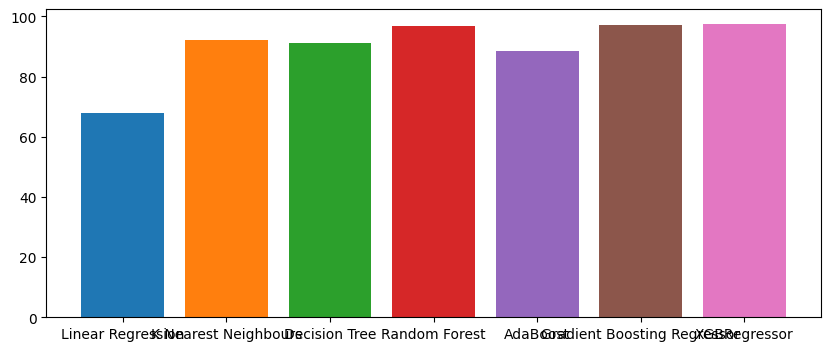

In [498]:
for regressor_name, regressor in regressors:

    regressor.fit(Xtrain, ytrain)
  
    y_pred = regressor.predict(Xtest)
    accuracy = round(r2_score(ytest,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (10,4)
    plt.bar(regressor_name,accuracy)

In [ ]:
poly=PolynomialFeatures(degree=2)
Xtrain_poly=poly.fit_transform(Xtrain)
Xtest_poly=poly.fit_transform(Xtest)

Linear Regression : 90 %
K Nearest Neighbours : 93 %
Decision Tree : 94 %
Random Forest : 97 %
AdaBoost : 88 %
Gradient Boosting Regressor : 98 %
XGBRegressor : 98 %


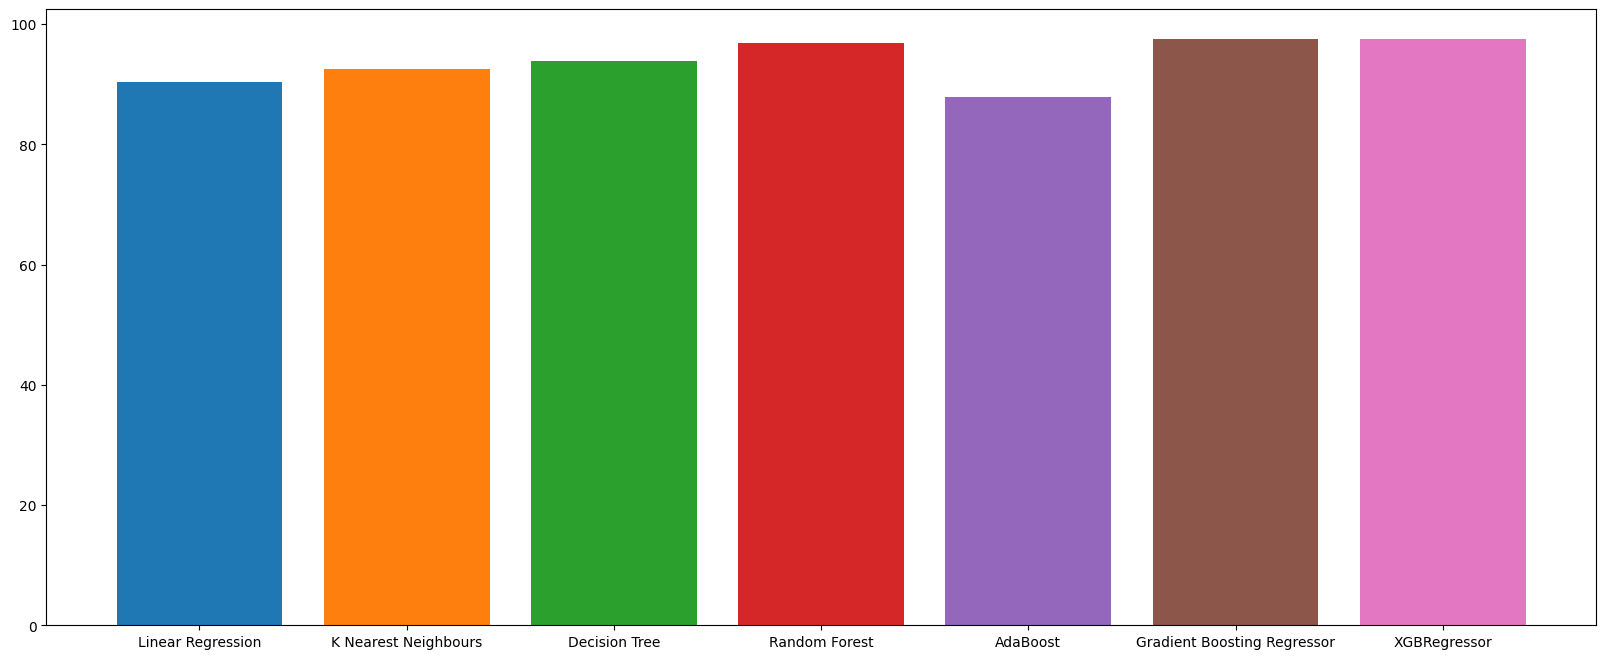

In [496]:

for regressor_name, regressor in regressors:

    regressor.fit(Xtrain_poly, ytrain)    
  
    y_pred = regressor.predict(Xtest_poly)
    accuracy = round(r2_score(ytest,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)